# Our Question:

In [1]:
import pandas as pd
import numpy as np
import nltk
import nltk.corpus

In [2]:
df = pd.read_csv('updated_train.csv')

In [3]:
df.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [4]:
df.dtypes

ID        object
text      object
target     int64
dtype: object

In [5]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\d', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [6]:
df['text'] = pd.DataFrame(df.text.apply(round1))
df

,ID,text,target
0,train_0,the bitcoin halving is cancelled due to,1
1,train_1,mercyofallah in good times wrapped in its gran...,0
2,train_2,days no digital india no murder of e learning...,1
3,train_3,india is likely to run out of the remaining rn...,1
4,train_4,in these tough times the best way to grow is t...,0
...,...,...,...
5282,train_6856,the spread of the novel among asylum seekers o...,1
5283,train_6857,hundreds of jewish patients are being treated...,1
5284,train_6858,beats me honestly most of the people i follow ...,0
5285,train_6859,help us reach more people by donating and shar...,0


In [7]:
# df.loc[(df.target == 1), 'target'] = 'covid_19_related'
# df.loc[(df.target == ), 'target'] = 'not_covid_19_related'

In [8]:
df

,ID,text,target
0,train_0,the bitcoin halving is cancelled due to,1
1,train_1,mercyofallah in good times wrapped in its gran...,0
2,train_2,days no digital india no murder of e learning...,1
3,train_3,india is likely to run out of the remaining rn...,1
4,train_4,in these tough times the best way to grow is t...,0
...,...,...,...
5282,train_6856,the spread of the novel among asylum seekers o...,1
5283,train_6857,hundreds of jewish patients are being treated...,1
5284,train_6858,beats me honestly most of the people i follow ...,0
5285,train_6859,help us reach more people by donating and shar...,0


In [9]:
# df.rename(columns = {1:'covid_19_related', 0:'not_covid_19_related'}, inplace = True)

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df['text'] = df['text'].apply(nltk.word_tokenize)

In [12]:
# from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()
 
# df['text'] = df['text'].apply(lambda x: [stemmer.stem(y) for y in x])

In [13]:
df['text']

0         [the, bitcoin, halving, is, cancelled, due, to]
1       [mercyofallah, in, good, times, wrapped, in, i...
2       [days, no, digital, india, no, murder, of, e, ...
3       [india, is, likely, to, run, out, of, the, rem...
4       [in, these, tough, times, the, best, way, to, ...
                              ...                        
5282    [the, spread, of, the, novel, among, asylum, s...
5283    [hundreds, of, jewish, patients, are, being, t...
5284    [beats, me, honestly, most, of, the, people, i...
5285    [help, us, reach, more, people, by, donating, ...
5286    [interest, rate, swap, derivative, pricing, in...
Name: text, Length: 5287, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

df['text'] = df['text'].apply(lambda x: ' '.join(x))

cv = CountVectorizer(stop_words='english')
text = cv.fit_transform(df['text'])
text_1 = cv.fit_transform(df['text'])


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer().fit(text)

text = transformer.transform(text)

In [16]:
data_1 = pd.DataFrame(text_1.toarray(), columns=cv.get_feature_names())
data_1['target'] = df['target']
data_1['target'] 

0       1
1       0
2       1
3       1
4       0
       ..
5282    1
5283    1
5284    0
5285    0
5286    0
Name: target, Length: 5287, dtype: int64

In [17]:
data = pd.DataFrame(text.toarray(), columns=cv.get_feature_names())
data['target'] = df['target']
data.head(10)

,aadil,aamiin,aaml,aap,aapg,aaron,aatay,ab,aba,abandon,abandoned,abandoning,abaryebpov,abba,abbas,abbreviated,abc,abcd,abd,abdalla,abdel,abducted,abdul,abeg,abelemkpe,abeokuta,abia,abiding,abilities,ability,abject,able,ablution,abo,abondoned,abondoning,abortion,abou,abounding,abp,...,zahd,zahra,zainab,zakaat,zakat,zambia,zamboanga,zane,zango,zarbreezy,zargar,zaturns,zawiya,zbqpyxzrvn,zcdkmanukj,zealand,zeinab,zeppelin,zermatt,zero,zetimi,zhampyaq,zheng,zhra,zhuhai,zimbabwe,zindi,zine,zionist,zombie,zone,zones,zoom,zoomed,zoomers,zoomies,zoos,zrouf,zudo,zw
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
d = data_1.groupby(by=["target"]).sum()

In [19]:
data_1 = d.transpose()
data_1.head(10 )

target,0,1
aadil,1,0
aamiin,1,0
aaml,0,1
aap,0,1
aapg,1,0
aaron,2,0
aatay,0,1
ab,2,1
aba,0,1
abandon,0,1


In [21]:
top_dict = {}
for c in data_1.columns:
    top = data_1[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{0: [('ramadan', 740),
  ('sports', 401),
  ('python', 244),
  ('twitter', 244),
  ('com', 241),
  ('pic', 233),
  ('mercyofallah', 224),
  ('food', 170),
  ('month', 166),
  ('learning', 162),
  ('allah', 158),
  ('like', 155),
  ('just', 139),
  ('time', 129),
  ('day', 127),
  ('people', 119),
  ('ai', 109),
  ('amp', 106),
  ('fasting', 101),
  ('cat', 94),
  ('machine', 90),
  ('dog', 85),
  ('don', 82),
  ('good', 82),
  ('know', 79),
  ('new', 78),
  ('today', 77),
  ('need', 75),
  ('help', 72),
  ('love', 71)],
 1: [('amp', 222),
  ('people', 182),
  ('new', 174),
  ('pandemic', 119),
  ('deaths', 104),
  ('trump', 101),
  ('health', 93),
  ('cases', 89),
  ('government', 85),
  ('just', 83),
  ('lockdown', 80),
  ('crisis', 78),
  ('world', 75),
  ('like', 72),
  ('patients', 71),
  ('need', 70),
  ('today', 69),
  ('state', 68),
  ('help', 65),
  ('china', 65),
  ('time', 64),
  ('uk', 64),
  ('news', 62),
  ('home', 62),
  ('death', 60),
  ('don', 57),
  ('says', 56),
  ('t

In [22]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

0
ramadan, sports, python, twitter, com, pic, mercyofallah, food, month, learning, allah, like, just, time
---
1
amp, people, new, pandemic, deaths, trump, health, cases, government, just, lockdown, crisis, world, like
---


In [23]:
from sklearn.feature_extraction import text 
from wordcloud import WordCloud

stop_words = text.ENGLISH_STOP_WORDS

wc = WordCloud(stopwords=None, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [48]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [60, 60]

In [43]:
df

,ID,text,target
0,train_0,the bitcoin halving is cancelled due to,1
1,train_1,mercyofallah in good times wrapped in its gran...,0
2,train_2,days no digital india no murder of e learning ...,1
3,train_3,india is likely to run out of the remaining rn...,1
4,train_4,in these tough times the best way to grow is t...,0
...,...,...,...
5282,train_6856,the spread of the novel among asylum seekers o...,1
5283,train_6857,hundreds of jewish patients are being treated ...,1
5284,train_6858,beats me honestly most of the people i follow ...,0
5285,train_6859,help us reach more people by donating and shar...,0


In [46]:
a = df[df['target']==1]['text'].str.cat(sep=' ')

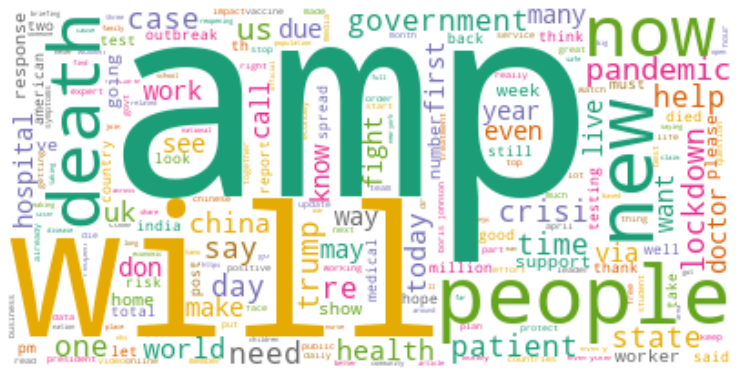

In [49]:
wc.generate(a)

plt.subplot(3, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()  

In [56]:
b = df[df['target']==0]['text'].str.cat(sep=' ')

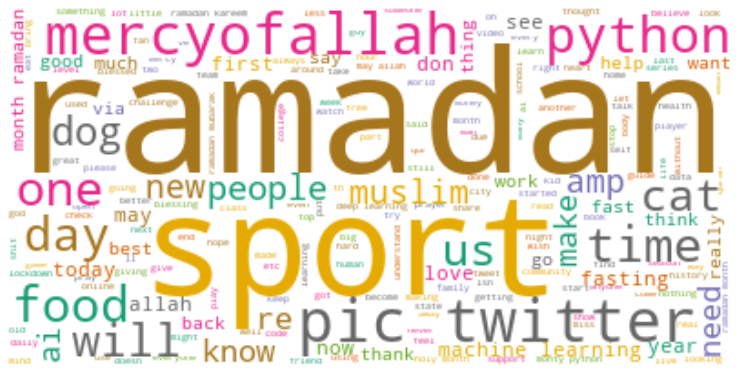

In [57]:
wc.generate(b)

plt.subplot(3, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()

In [27]:
df.text[comedian]/

'mercyofallah in good times wrapped in its granular detail i challenge myself to find meaning and model the humility t'

In [ ]:
X = text.toarray()
y = df['target']